# Mounting drive and extracting images

In [ ]:
!pip install py7zr
!pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 514.7 kB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import py7zr
with py7zr.SevenZipFile("/content/drive/Shareddrives/Liu Liu Research/Merged_data.7z", 'r') as archive:
  archive.extractall(path="/imgdata")

#~7 mins loading time

In [ ]:
#!pip list

# Library and File Management

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
path = '/content/drive/Shareddrives/Liu Liu Research'
csvFile = path+'/Merged_data.csv'
data_path = '/imgdata/Merged_Data'
movies = pd.read_csv(csvFile)

# Text Data Preprocessing

In [ ]:
movies['genre'] = movies['genre'].str.replace(' ','')
movies = movies.loc[movies['genre']!='']
print("Before Length",len(movies))
movies.head()

Before Length 44370


,movieid,title,genre,movie_fname,liu_data
0,tt0096913,Best of the Best,Action|Drama|Sport|Thriller,tt0096913,1
1,tt0106393,Best of the Best II,Action|Crime|Drama|Thriller,tt0106393,1
2,tt0109040,Ace Ventura: Pet Detective,Comedy,tt0109040,1
3,tt0112281,Ace Ventura: When Nature Calls,Adventure|Comedy,tt0112281,1
4,tt0094137,3 Men and a Baby,Comedy|Drama|Family,tt0094137,1


In [ ]:
genreTest = [y for i in movies['genre'] for y in i.split()]
genreTest[0:10]

['Action|Drama|Sport|Thriller',
 'Action|Crime|Drama|Thriller',
 'Comedy',
 'Adventure|Comedy',
 'Comedy|Drama|Family',
 'Comedy|Drama|Family|Romance',
 'Mystery|Thriller',
 'Crime|Drama',
 'Crime|Drama',
 'Crime|Drama']

In [ ]:
top_genres = ['Drama', 'Comedy', 'Romance', 'Thriller', 'Horror', 'Action']
movies['genre'] = [i if i.split('|')[0] in top_genres else '' for i in movies['genre']]
movies = movies.loc[movies['genre']!='']
print("after preprocessing", len(movies))
# Removing genres not in top_genres
movies['genre'] = movies['genre'].apply(lambda y: '|'.join([x for x in y.split('|') if x in top_genres]))

after preprocessing 31901


In [ ]:
movies.shape

(31901, 5)

In [ ]:
from os import walk

f = []
for (dirpath, dirnames, filenames) in walk(data_path):
    f.extend(filenames)
    break
IDs = [ids.split('.')[0] for ids in f]


In [ ]:
IDs[0:10]

['tt2401878',
 'tt0043014',
 'tt0031835',
 'tt1179025',
 'tt0055227',
 'tt0063531',
 'tt0212235',
 'tt0066279',
 'tt0093723',
 'tt0337717']

In [ ]:
finalMovies = movies[['movieid', 'movie_fname', 'genre']].dropna()
finalMovies = pd.merge(pd.DataFrame({'movie_fname':IDs}), finalMovies, on = 'movie_fname', how = 'inner')
finalMovies["genre"]=finalMovies["genre"].apply(lambda x:x.split("|"))
finalMovies["movie_fname"]=finalMovies["movie_fname"]+'.jpg'
finalMovies.head()

,movie_fname,movieid,genre
0,tt0043014.jpg,tt0043014,[Drama]
1,tt0031835.jpg,tt0031835,"[Drama, Romance]"
2,tt0212235.jpg,tt0212235,[Comedy]
3,tt0066279.jpg,tt0066279,[Drama]
4,tt0337717.jpg,tt0337717,[Thriller]


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_2, *['movie_fname'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_3, *['movieid'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_4, *['movie_fname', 'movieid'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_5, *['index', 'movie_fname'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_6, *['index', 'movieid'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_7, *['index', 'count()', 'movie_fname'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_8, *['index', 'count()', 'movieid'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_9, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_10, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_11, *['movie_fname'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_12, *['movieid'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_13, *['movie_fname', 'movieid'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_14, *['index', 'movie_fname'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_15, *['index', 'movieid'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_16, *['index', 'count()', 'movie_fname'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_17, *['index', 'count()', 'movieid'], **{})
chart

In [ ]:
finalCount = finalMovies.shape[0]
finalMovies.shape

(31569, 3)

In [ ]:
finalMovies.sample(100)

,movie_fname,movieid,genre
10214,tt0408730.jpg,tt0408730,[Comedy]
24288,tt0043018.jpg,tt0043018,[Drama]
26041,tt0450238.jpg,tt0450238,[Comedy]
15320,tt0339236.jpg,tt0339236,"[Action, Drama, Horror, Thriller]"
1583,tt0266820.jpg,tt0266820,[Comedy]
...,...,...,...
28436,tt1213825.jpg,tt1213825,"[Comedy, Romance]"
19485,tt0791309.jpg,tt0791309,"[Drama, Comedy]"
20151,tt1646214.jpg,tt1646214,"[Romance, Comedy]"
17871,tt0180837.jpg,tt0180837,"[Comedy, Romance, Drama]"


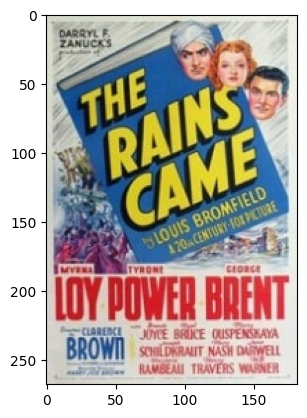

['Drama', 'Romance']


In [ ]:
def showImageData(index):
  dfIndex = index
  posterSample = plt.imread(data_path+'/'+finalMovies.loc[dfIndex, 'movie_fname'])
  plt.imshow(posterSample)
  #plt.axis('off')
  plt.show()
  print(finalMovies.loc[dfIndex,'genre'])

showImageData(1)

#Load Image Data

In [ ]:
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
batchSize = 64
train_split = int(finalCount*0.8)
validation_split = int(finalCount*0.9)
print(train_split,validation_split)
print("Group Sizes:",train_split,validation_split-train_split,finalCount-validation_split)


25255 28412
Group Sizes: 25255 3157 3157


In [ ]:
generator = ImageDataGenerator(rescale=1.0/255)
testGenerator = ImageDataGenerator(rescale=1.0/255)

train_generator = generator.flow_from_dataframe(
    dataframe=finalMovies[:train_split],
    directory=data_path,
    x_col="movie_fname",
    y_col="genre",
    batch_size=batchSize,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(182,268)
    )

val_generator = testGenerator.flow_from_dataframe(
    dataframe=finalMovies[train_split:validation_split],
    directory=data_path,
    x_col="movie_fname",
    y_col="genre",
    batch_size=batchSize,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(182,268)
    )

test_generator = testGenerator.flow_from_dataframe(
    dataframe=finalMovies[validation_split:],
    directory=data_path,
    x_col="movie_fname",
    batch_size=1,
    shuffle=False,
    class_mode=None,
    target_size=(182,268)
    )

Found 25255 validated image filenames belonging to 6 classes.
Found 3157 validated image filenames belonging to 6 classes.
Found 3157 validated image filenames.


In [ ]:
train_generator

#Model Implementation

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from IPython.display import clear_output
import tensorflow_hub as hub

In [ ]:
keras_layer = hub.KerasLayer("https://www.kaggle.com/models/google/resnet-v2/frameworks/TensorFlow2/variations/50-classification/versions/2")


In [ ]:
inputs = tf.keras.Input(shape= target_size + (3,))
# x = keras_layer(inputs)
x = tf.keras.layers.Dense(224, activation='relu')(inputs)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(train_split, activation='softmax')(x)
model = keras.Model(inputs, outputs)
model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 0, 0, 3)]         0         
                                                                 
 dense_3 (Dense)             (None, 0, 0, 224)         896       
                                                                 
 dropout_2 (Dropout)         (None, 0, 0, 224)         0         
                                                                 
 dense_4 (Dense)             (None, 0, 0, 25255)       5682375   
                                                                 
Total params: 5,683,271
Trainable params: 5,683,271
Non-trainable params: 0
_________________________________________________________________


In [ ]:
"""
import keras
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
from keras import Sequential
import tensorflow as tf

# define a sequential model
model = Sequential()

# first conv-pool block, i.e., first conv layer and first max pooling layer
# add batch normalization after all conv blocks
model.add(Conv2D(96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(182,268,3)))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(BatchNormalization())

# second conv-pool block, i.e., 2nd conv layer and 2nd max pooling layer
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# next layer of filter
model.add(Conv2D(256, kernel_size=(5,5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(BatchNormalization())

# third conv-pool block, i.e., 3rd, 4th, and 5th conv layers and the max pooling
# layer after them
model.add(Conv2D(384, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(BatchNormalization())

# dense layers
# dropout rate = 0.5 after each dense layer
model.add(Flatten())
model.add(Dense(4096, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='tanh'))
model.add(Dropout(0.5))

# output layer
model.add(Dense(6, activation='sigmoid'))
"""

In [ ]:
from keras import backend as K

def hamming_loss(y_true, y_pred):
    zero = K.constant(0, dtype=tf.float32)
    one = K.constant(1, dtype=tf.float32)
    hamming_loss = K.mean(K.not_equal(y_true, K.round(y_pred)))
    return hamming_loss


In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=val_generator.n//val_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

train_generator
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[hamming_loss])
history = model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=val_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=16,
                    verbose=1,
                    shuffle=True)

Epoch 1/16


ValueError: ignored

#Save/Load Model

In [ ]:
#model.save(path+'/model1.keras')

In [ ]:
#model = keras.models.load_model(path+'/model1.keras')

#Testing and Statistics

In [ ]:
def plot_learning_curve(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

plot_learning_curve(history)


In [ ]:
predict = model.predict_generator(test_generator,steps=(finalCount-validation_split),verbose=1)

In [ ]:
testIndex=8
showImageData(validation_split+testIndex)
print(top_genres)
print(predict[testIndex])

#Todo


*   Change activation function, sigmoid w/ multiple classes > softmax (Jiasheng did)
*   Try adding layers, different models (April will look at changing architecture)
*   Data Augmentation (read the article) 2
*   Add better/custom loss, accuracy functions (done)

